In [1]:
import pandas as pd
import yfinance as yf
from datetime import date

In [2]:
# data = yf.download("NIFTY", start="2010-01-01", end="2021-7-20")
data = pd.read_csv("NIFTY50_Data.csv")

In [3]:
data

,Date,Open,High,Low,Close
0,5-Jan-22,17820.10,17944.70,17748.85,17925.25
1,6-Jan-22,17768.50,17797.95,17655.55,17745.90
2,7-Jan-22,17797.60,17905.00,17704.55,17812.70
3,10-Jan-22,17913.30,18017.45,17879.15,18003.30
4,11-Jan-22,17997.75,18081.25,17964.40,18055.75
...,...,...,...,...,...
317,19-Apr-23,17653.35,17666.15,17579.85,17618.75
318,20-Apr-23,17638.60,17684.45,17584.35,17624.45
319,21-Apr-23,17639.75,17663.20,17553.95,17624.05
320,24-Apr-23,17707.55,17754.50,17612.50,17743.40


In [4]:
data.shape

(322, 5)

In [5]:
data.head()

,Date,Open,High,Low,Close
0,5-Jan-22,17820.10,17944.70,17748.85,17925.25
1,6-Jan-22,17768.50,17797.95,17655.55,17745.90
2,7-Jan-22,17797.60,17905.00,17704.55,17812.70
3,10-Jan-22,17913.30,18017.45,17879.15,18003.30
4,11-Jan-22,17997.75,18081.25,17964.40,18055.75


In [6]:
data.tail()

,Date,Open,High,Low,Close
317,19-Apr-23,17653.35,17666.15,17579.85,17618.75
318,20-Apr-23,17638.60,17684.45,17584.35,17624.45
319,21-Apr-23,17639.75,17663.20,17553.95,17624.05
320,24-Apr-23,17707.55,17754.50,17612.50,17743.40
321,25-Apr-23,17761.55,17807.45,17716.85,17769.25


In [7]:
close = data[['Close']]

<AxesSubplot:>

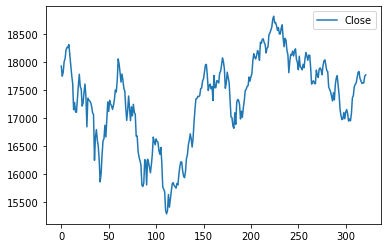

In [8]:
close.plot()

In [9]:
import matplotlib.pyplot as plt

In [10]:
ds = close.values

In [11]:
ds

array([[17925.25],
       [17745.9 ],
       [17812.7 ],
       [18003.3 ],
       [18055.75],
       [18212.35],
       [18257.8 ],
       [18255.75],
       [18308.1 ],
       [18113.05],
       [17938.4 ],
       [17757.  ],
       [17617.15],
       [17149.1 ],
       [17277.95],
       [17110.15],
       [17101.95],
       [17339.85],
       [17576.85],
       [17780.  ],
       [17560.2 ],
       [17516.3 ],
       [17213.6 ],
       [17266.75],
       [17463.8 ],
       [17605.85],
       [17374.75],
       [16842.8 ],
       [17352.45],
       [17322.2 ],
       [17304.6 ],
       [17276.3 ],
       [17206.65],
       [17092.2 ],
       [17063.25],
       [16247.95],
       [16658.4 ],
       [16793.9 ],
       [16605.95],
       [16498.05],
       [16245.35],
       [15863.15],
       [16013.45],
       [16345.35],
       [16594.9 ],
       [16630.45],
       [16871.3 ],
       [16663.  ],
       [16975.35],
       [17287.05],
       [17117.6 ],
       [17315.5 ],
       [1724

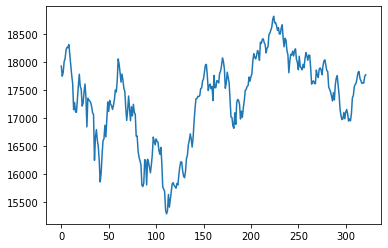

In [12]:
plt.plot(ds)

In [13]:
import numpy as np

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
#Normalizing values between 0 & 1
normalizer = MinMaxScaler(feature_range=(0,1))
ds_scald = normalizer.fit_transform(np.array(ds).reshape(-1,1))

In [16]:
len(ds_scald), len(ds)

(322, 322)

In [17]:
#Defining test and train data size
train_size = int(len(ds_scald)*0.70)
test_size = len(ds_scald) - train_size

In [18]:
 train_size, test_size

(225, 97)

In [19]:
ds_train, ds_test = ds_scald[0:train_size,:], ds_scald[train_size:len(ds_scald),:1]

In [20]:
type(ds_train)

numpy.ndarray

In [21]:
len(ds_train), len(ds_test)

(225, 97)

In [22]:
def create_ds(dataset, step):
    Xtrain, Ytrain = [],  []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i+step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [23]:
time_stamp = 60
x_train, y_train = create_ds(ds_train,time_stamp)
x_test, y_test = create_ds(ds_test,time_stamp)

In [24]:
x_train.shape, y_train.shape

((164, 60), (164,))

In [25]:
x_test.shape, y_test.shape

((36, 60), (36,))

In [26]:
#Reshaping
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [27]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [28]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
#Training model with adam
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
3/3 [==============================] - 5s 516ms/step - loss: 0.2667 - val_loss: 0.1235
Epoch 2/100
3/3 [==============================] - 0s 109ms/step - loss: 0.0948 - val_loss: 0.0315
Epoch 3/100
3/3 [==============================] - 0s 102ms/step - loss: 0.0643 - val_loss: 0.0414
Epoch 4/100
3/3 [==============================] - 0s 108ms/step - loss: 0.0366 - val_loss: 0.0134
Epoch 5/100
3/3 [==============================] - 0s 108ms/step - loss: 0.0378 - val_loss: 0.0271
Epoch 6/100
3/3 [==============================] - 0s 89ms/step - loss: 0.0424 - val_loss: 0.0173
Epoch 7/100
3/3 [==============================] - 0s 90ms/step - loss: 0.0326 - val_loss: 0.0096
Epoch 8/100
3/3 [==============================] - 0s 95ms/step - loss: 0.0266 - val_loss: 0.0157
Epoch 9/100
3/3 [==============================] - 0s 119ms/step - loss: 0.0303 - val_loss: 0.0155
Epoch 10/100
3/3 [==============================] - 0s 107ms/step - loss: 0.0279 - val_loss: 0.0097
Epoch 11/100

3/3 [==============================] - 0s 112ms/step - loss: 0.0069 - val_loss: 0.0069
Epoch 84/100
3/3 [==============================] - 0s 119ms/step - loss: 0.0072 - val_loss: 0.0070
Epoch 85/100
3/3 [==============================] - 0s 114ms/step - loss: 0.0073 - val_loss: 0.0062
Epoch 86/100
3/3 [==============================] - 0s 126ms/step - loss: 0.0070 - val_loss: 0.0062
Epoch 87/100
3/3 [==============================] - 0s 113ms/step - loss: 0.0069 - val_loss: 0.0061
Epoch 88/100
3/3 [==============================] - 0s 101ms/step - loss: 0.0067 - val_loss: 0.0061
Epoch 89/100
3/3 [==============================] - 0s 114ms/step - loss: 0.0067 - val_loss: 0.0061
Epoch 90/100
3/3 [==============================] - 0s 95ms/step - loss: 0.0068 - val_loss: 0.0059
Epoch 91/100
3/3 [==============================] - 0s 93ms/step - loss: 0.0063 - val_loss: 0.0061
Epoch 92/100
3/3 [==============================] - 0s 89ms/step - loss: 0.0064 - val_loss: 0.0058
Epoch 93/100
3/3

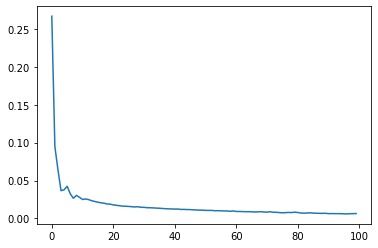

In [30]:
loss = model.history.history['loss']
plt.plot(loss)

In [31]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

2/2 [==============================] - 0s 15ms/step


In [32]:
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)

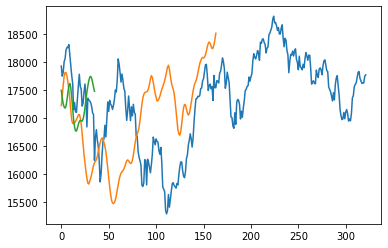

In [33]:
plt.plot(normalizer.inverse_transform(ds_scald))
plt.plot(train_predict)
plt.plot(test_predict)

In [34]:
type(train_predict)

numpy.ndarray

In [35]:
test = np.vstack((train_predict, test_predict))

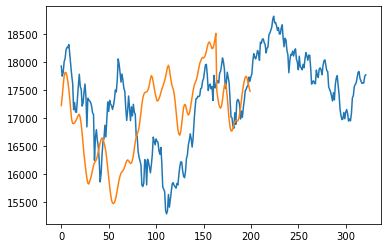

In [36]:
plt.plot(normalizer.inverse_transform(ds_scald))
plt.plot(test)

In [37]:
len(ds_test)

97

In [38]:
#Getting the last 50 days records
fut_inp = ds_test[47:]

In [39]:
fut_inp = fut_inp.reshape(1,-1)

In [40]:
tmp_inp = list(fut_inp)

In [41]:
fut_inp.shape

(1, 50)

In [42]:
#Creating list of last 50 days
tmp_inp = tmp_inp[0].tolist()

In [43]:
#Predict next 30 days price using the current data
#It will predict in sliding window manner(algorithm) with stride1
lst_output = []
n_steps = 50
i = 0
while(i<10):
    
    if(len(tmp_inp)>50):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp = fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1,n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1,n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
        
print(lst_output)

[[0.6164531707763672], [0.6169982552528381], [0.6105809211730957], [0.5988534092903137], [0.5842602849006653], [0.5686407089233398], [0.5530052185058594], [0.5377618074417114], [0.5229997038841248], [0.508687436580658]]


In [44]:
len(ds_scald)

322

In [45]:
# Creating a dummy plane to plot graph one after another
plot_new = np.arange(1,51)
plot_pred = np.arange(51,61)

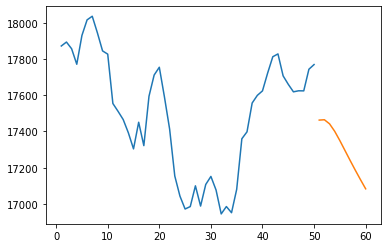

In [46]:
plt.plot(plot_new, normalizer.inverse_transform(ds_scald[272:]))
plt.plot(plot_pred, normalizer.inverse_transform(lst_output))

In [47]:
ds_new = ds_scald.tolist()

In [48]:
len(ds_new)

322

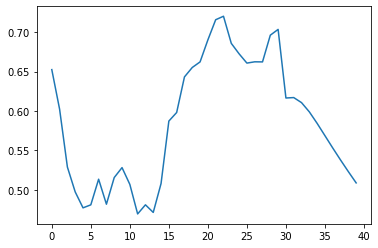

In [49]:
ds_new.extend(lst_output)
plt.plot(ds_new[292:])

In [50]:
final_graph = normalizer.inverse_transform(ds_new).tolist()

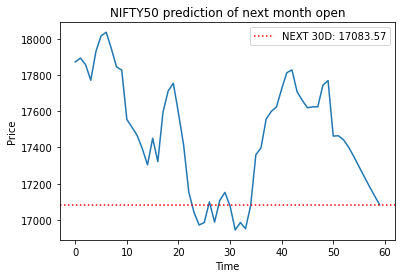

In [51]:
plt.plot(final_graph[272:],)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("NIFTY50 prediction of next month open")
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()